In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
train_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/train.csv')
test_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/test.csv')
sub_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/sample_submission.csv')

In [40]:
train_df.shape,test_df.shape

((233154, 41), (112392, 40))

In [41]:
train_df['is_train'] = ''
test_df['is_train'] = ''
data = pd.DataFrame()
train_df.loc[:,'is_train'] = 1
test_df.loc[:,'is_train'] = 0
data = data.append(train_df,sort=False).append(test_df,sort=False)

In [42]:
data.reset_index(inplace=True)

In [43]:
#Treat missing values
#86 % values are no so it is safe to impute NO
train_df['Employment.Type'].fillna('Self employed',inplace=True)
test_df['Employment.Type'].fillna('Self employed',inplace=True)


In [44]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [45]:
test_df.shape,train_df.shape,test_df.shape

((112392, 41), (233154, 42), (112392, 41))

In [46]:
#create mean and st dev features- leakage features
ft_name = ['loan_default']
var = ['branch_id','State_ID']
fntouse = list([np.mean,np.sum])

# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for fn2use in fntouse:
        for var_name in var:
            temp3 = train_df.pivot_table(values=ftname,index=[var_name],aggfunc=fn2use)
            # temp2.plot(kind='bar')
            temp3.reset_index(inplace=True)
            temp3.columns = [var_name, var_name+'_'+ftname+'_'+str(fn2use).split(' ')[1]]
            train_df = train_df.merge(temp3,on=var_name, how = 'left')
            test_df = test_df.merge(temp3,on=var_name, how = 'left')
    #         data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

            # df = pd.concat([temp2,temp3],axis=1)

In [47]:
train_df['CREDIT.HISTORY.LENGTH.YEARS'] = train_df['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[0][:-3]))

test_df['CREDIT.HISTORY.LENGTH.YEARS'] = test_df['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[0][:-3]))

In [48]:
train_df['CREDIT.HISTORY.LENGTH.MONTHS'] = train_df['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[1][:-3]))

test_df['CREDIT.HISTORY.LENGTH.MONTHS'] = test_df['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[1][:-3]))

In [49]:
train_df['CREDIT.HISTORY.LENGTH.TOTMONS'] = train_df['CREDIT.HISTORY.LENGTH.MONTHS'] + np.dot(train_df['CREDIT.HISTORY.LENGTH.YEARS'],12)

test_df['CREDIT.HISTORY.LENGTH.TOTMONS'] = test_df['CREDIT.HISTORY.LENGTH.MONTHS'] + np.dot(test_df['CREDIT.HISTORY.LENGTH.YEARS'],12)

In [50]:
train_df['AVERAGE.ACCT.AGE.YEARS'] = train_df['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[0][:-3]))

train_df['AVERAGE.ACCT.AGE.MONTHS'] = train_df['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[1][:-3]))

train_df['AVERAGE.ACCT.AGE.TOTMONS'] = train_df['AVERAGE.ACCT.AGE.MONTHS'] + np.dot(train_df['AVERAGE.ACCT.AGE.YEARS'],12)



test_df['AVERAGE.ACCT.AGE.YEARS'] = test_df['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[0][:-3]))

test_df['AVERAGE.ACCT.AGE.MONTHS'] = test_df['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[1][:-3]))

test_df['AVERAGE.ACCT.AGE.TOTMONS'] = test_df['AVERAGE.ACCT.AGE.MONTHS'] + np.dot(test_df['AVERAGE.ACCT.AGE.YEARS'],12)

In [51]:
data['Date.of.Birth'][0]

'01-01-84'

In [52]:
train_df['Date.of.Birth.YEAR'] = train_df['Date.of.Birth'].map(lambda x : int(x.split('-')[2]))

test_df['Date.of.Birth.YEAR'] = test_df['Date.of.Birth'].map(lambda x : int(x.split('-')[2]))

In [53]:
train_df['Date.of.Birth.YEAR.conv'] = ''

test_df['Date.of.Birth.YEAR.conv'] = ''

In [54]:
train_df.loc[train_df['Date.of.Birth.YEAR']==0,'Date.of.Birth.YEAR.conv'] = 2000

test_df.loc[test_df['Date.of.Birth.YEAR']==0,'Date.of.Birth.YEAR.conv'] = 2000

In [55]:
train_df.loc[train_df['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR.conv'] = train_df.loc[train_df['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR']+1900

test_df.loc[test_df['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR.conv'] = test_df.loc[test_df['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR']+1900

In [56]:
train_df['Date.of.Birth.AGE'] = ''

train_df['Date.of.Birth.AGE'] = 2019 - train_df.loc[:,'Date.of.Birth.YEAR.conv']

test_df['Date.of.Birth.AGE'] = ''

test_df['Date.of.Birth.AGE'] = 2019 - test_df.loc[:,'Date.of.Birth.YEAR.conv']

In [57]:
#st dev and mean of ltv feature

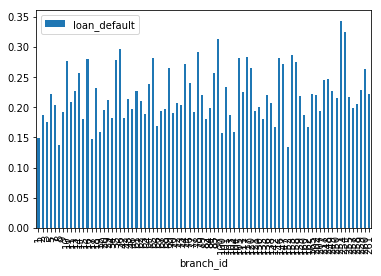

In [58]:
temp2 = data.pivot_table(values='loan_default',index=['branch_id'],aggfunc=np.mean)
# print('Frequency Table for Credit History:') 
# print(temp2)

# fig = plt.figure(figsize=(8,4))
# ax1 = fig.add_subplot(121)
# ax1.set_xlabel('Credit_History')
# ax1.set_ylabel('Count of Applicants')
# ax1.set_title("Applicants by Credit_History")
temp2.plot(kind='bar')



In [59]:
#create mean and st dev features


ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT']


#All 208 features - aggregated

# ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',
#            'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
#        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
#        'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
#        'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
#        'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
#        'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',]


    
var = ['Current_pincode_ID','branch_id','supplier_id','manufacturer_id','State_ID','Employee_code_ID']
# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for var_name in var:
        temp3 = train_df.pivot_table(values=ftname,index=[var_name],aggfunc=np.mean)
        
        temp4 = test_df.pivot_table(values=ftname,index=[var_name],aggfunc=np.mean)

        # temp2.plot(kind='bar')
        temp3.reset_index(inplace=True)
        temp4.reset_index(inplace=True)
        
        temp3.columns = [var_name, var_name+'_'+ftname+'_mean']
        temp4.columns = [var_name, var_name+'_'+ftname+'_mean']
        
        train_df = train_df.merge(temp3,on=var_name, how = 'left')
        test_df = test_df.merge(temp4,on=var_name, how = 'left')
        
        train_df[var_name+'_stdev'] = train_df[ftname]-train_df[var_name+'_'+ftname+'_mean']
        
        test_df[var_name+'_stdev'] = test_df[ftname]-test_df[var_name+'_'+ftname+'_mean']

        # df = pd.concat([temp2,temp3],axis=1)

In [60]:
# data = data.merge(temp3,on='Current_pincode_ID', how = 'left')

In [61]:
# data['ltv_stdev'] = data['ltv']-data['ltv_mean']

In [62]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'] = train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(' ', '_', regex=True)

test_df['PERFORM_CNS.SCORE.DESCRIPTION'] = test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(' ', '_', regex=True)

In [63]:
#treat categorical variables
from sklearn.preprocessing import OneHotEncoder

d = pd.DataFrame()

var_mod = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

x = pd.get_dummies(train_df[var_mod])
x1 = pd.get_dummies(test_df[var_mod])

train_df  = train_df.drop(var_mod,axis=1)
train_df = pd.concat([train_df,x], axis=1)

test_df  = test_df.drop(var_mod,axis=1)
test_df = pd.concat([test_df,x1], axis=1)


# for i in var_mod:
#     print(i)
# #     d[str(i)] 
#     dd = le.fit_transform(data.loc[:,i]).toarray()
#     print(dd.shape)
# d.dtypes


In [64]:
train_df.shape,test_df.shape

((233154, 111), (112392, 109))

In [65]:
main_list = np.setdiff1d(list(train_df.columns),list(test_df.columns))

In [66]:
main_list #need to drop these variables from both test and train

array(['PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
       'loan_default'], dtype='<U85')

In [ ]:
data['ltv'].hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**2).hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**1/3).hist(bins=50)
plt.show()

In [67]:
train_df['log_disbursed_amount'] = np.log(train_df['disbursed_amount'])
train_df['log_asset_cost'] = np.log(train_df['asset_cost'])

test_df['log_disbursed_amount'] = np.log(test_df['disbursed_amount'])
test_df['log_asset_cost'] = np.log(test_df['asset_cost'])

In [68]:
train_df['ltv_squared'] = train_df['ltv']**2
train_df['log_ltv'] = np.log(train_df['ltv'])

test_df['ltv_squared'] = test_df['ltv']**2
test_df['log_ltv'] = np.log(test_df['ltv'])

In [69]:
train_df['DisbursalDate'][0]

'03-08-18'

In [70]:
train_df['DisbursalDate.YEAR'] = train_df['DisbursalDate'].map(lambda x : int(x.split('-')[2]))

test_df['DisbursalDate.YEAR'] = test_df['DisbursalDate'].map(lambda x : int(x.split('-')[2]))

train_df['DisbursalDate.YEAR.conv'] = ''

test_df['DisbursalDate.YEAR.conv'] = ''

train_df.loc[train_df['DisbursalDate.YEAR']==0,'DisbursalDate.YEAR.conv'] = 2000

test_df.loc[test_df['DisbursalDate.YEAR']==0,'DisbursalDate.YEAR.conv'] = 2000

train_df.loc[train_df['DisbursalDate.YEAR']>0,'DisbursalDate.YEAR.conv'] = train_df.loc[train_df['DisbursalDate.YEAR']>0,'DisbursalDate.YEAR']+1900

test_df.loc[test_df['DisbursalDate.YEAR']>0,'DisbursalDate.YEAR.conv'] = test_df.loc[test_df['DisbursalDate.YEAR']>0,'DisbursalDate.YEAR']+1900

train_df['DisbursalDate.AGE'] = ''

train_df['DisbursalDate.AGE'] = 2019 - train_df.loc[:,'DisbursalDate.YEAR.conv']

test_df['DisbursalDate.AGE'] = ''

test_df['DisbursalDate.AGE'] = 2019 - test_df.loc[:,'DisbursalDate.YEAR.conv']

In [71]:
train_df['DisbursalDate_month'] = train_df['DisbursalDate'].map(lambda x : int(x.split('-')[1]))
train_df['DisbursalDate_dayofmonth'] = train_df['DisbursalDate'].map(lambda x : int(x.split('-')[0]))

test_df['DisbursalDate_month'] = test_df['DisbursalDate'].map(lambda x : int(x.split('-')[1]))
test_df['DisbursalDate_dayofmonth'] = test_df['DisbursalDate'].map(lambda x : int(x.split('-')[0]))


In [72]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

UniqueID                                                                                 0
disbursed_amount                                                                         0
asset_cost                                                                               0
ltv                                                                                      0
branch_id                                                                                0
supplier_id                                                                              0
manufacturer_id                                                                          0
Current_pincode_ID                                                                       0
Date.of.Birth                                                                            0
DisbursalDate                                                                            0
State_ID                                                                                 0

In [ ]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

In [73]:
train_df.shape,test_df.shape

((233154, 120), (112392, 118))

In [75]:
main_list = np.setdiff1d(list(train_df.columns),list(test_df.columns))

main_list #need to drop these variables from both test and train

array(['PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
       'loan_default'], dtype='<U85')

In [76]:
list(train_df.columns)

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Date.of.Birth',
 'DisbursalDate',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'loan_default',
 'is_train',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS'

In [85]:

##Single best model predictors



predictors = [
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS',
 'CREDIT.HISTORY.LENGTH.TOTMONS',
 'AVERAGE.ACCT.AGE.YEARS',
 'AVERAGE.ACCT.AGE.MONTHS',
 'AVERAGE.ACCT.AGE.TOTMONS',
 'Date.of.Birth.YEAR',
 'Date.of.Birth.YEAR.conv',
 'Date.of.Birth.AGE',
 'Current_pincode_ID_disbursed_amount_mean',
 'Current_pincode_ID_stdev',
 'branch_id_disbursed_amount_mean',
 'branch_id_stdev',
 'supplier_id_disbursed_amount_mean',
 'supplier_id_stdev',
 'manufacturer_id_disbursed_amount_mean',
 'manufacturer_id_stdev',
 'State_ID_disbursed_amount_mean',
 'State_ID_stdev',
 'Employee_code_ID_disbursed_amount_mean',
 'Employee_code_ID_stdev',
 'Current_pincode_ID_asset_cost_mean',
 'branch_id_asset_cost_mean',
 'supplier_id_asset_cost_mean',
 'manufacturer_id_asset_cost_mean',
 'State_ID_asset_cost_mean',
 'Employee_code_ID_asset_cost_mean',
 'Current_pincode_ID_ltv_mean',
 'branch_id_ltv_mean',
 'supplier_id_ltv_mean',
 'manufacturer_id_ltv_mean',
 'State_ID_ltv_mean',
 'Employee_code_ID_ltv_mean',
 'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
 'branch_id_PERFORM_CNS.SCORE_mean',
 'supplier_id_PERFORM_CNS.SCORE_mean',
 'manufacturer_id_PERFORM_CNS.SCORE_mean',
 'State_ID_PERFORM_CNS.SCORE_mean',
 'Employee_code_ID_PERFORM_CNS.SCORE_mean',
 'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
 'branch_id_PRIMARY.INSTAL.AMT_mean',
 'supplier_id_PRIMARY.INSTAL.AMT_mean',
 'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
 'State_ID_PRIMARY.INSTAL.AMT_mean',
 'Employee_code_ID_PRIMARY.INSTAL.AMT_mean',
 'Employment.Type_Salaried',
 'Employment.Type_Self employed',
 'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
 'log_disbursed_amount',
 'log_asset_cost',
 'ltv_squared',
 'log_ltv',
 'DisbursalDate.YEAR',
 'DisbursalDate.YEAR.conv',
 'DisbursalDate.AGE',
 'DisbursalDate_month',
 'DisbursalDate_dayofmonth']

# PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found

outcome = ['loan_default']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(train_df[predictors], train_df[outcome], test_size=0.3, random_state=1234)

In [87]:
X_train.shape,X_validation.shape

((163207, 112), (69947, 112))

In [80]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [81]:

alg = XGBClassifier()

In [ ]:
#kf = loo.split(X_train_std[predictor_var])
kf = KFold(n_splits=10).split(X_train[['State_ID','branch_id']])
# ['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID']
error = []
# yavg = pd.DataFrame()

for train, test in kf:
    # Filter training data
    print("training stared")
    train_predictors = X_train[predictors].iloc[train,:]

    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train].values

    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    y1 = alg.predict(X_train[predictors].iloc[test,:])
#     yavg = yavg.append(pd.Series(y1),ignore_index=True)

    #Record error from each cross-validation run
    error.append(metrics.roc_auc_score(y_train.iloc[test], y1))
    print('score for current fold',metrics.roc_auc_score(y_train.iloc[test], y1))
    print("training finished")
print ("Cross-Validation AUC Score : %f" % np.mean(error))


In [ ]:
# metrics.roc_auc_score(y_train.iloc[test], )
# np.transpose(yavg.loc[yavg['index']=='mean',:])[1:]
y_train.shape

In [82]:
def modelfit(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
    sub_df['loan_default']= dtrain_predprob1
    sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')  
  

In [83]:
def modelfit_mod(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
#     sub_df['loan_default']= dtrain_predprob1
#     sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')  
  

[0]	train-auc:0.6107+0.000623904	test-auc:0.608641+0.00103163
[1]	train-auc:0.616618+0.00302824	test-auc:0.614435+0.00306969
[2]	train-auc:0.621832+0.00152077	test-auc:0.618592+0.00144529
[3]	train-auc:0.624968+0.00120435	test-auc:0.62211+0.000851338
[4]	train-auc:0.626644+0.00110633	test-auc:0.623532+0.00179662
[5]	train-auc:0.629156+0.00101006	test-auc:0.626108+0.00216922
[6]	train-auc:0.629988+0.000745645	test-auc:0.62737+0.00196972
[7]	train-auc:0.632829+0.00117668	test-auc:0.629741+0.00235557
[8]	train-auc:0.63435+0.00149388	test-auc:0.630859+0.00237723
[9]	train-auc:0.635824+0.00162741	test-auc:0.632232+0.00254056
[10]	train-auc:0.636549+0.00104259	test-auc:0.632895+0.00206902
[11]	train-auc:0.637768+0.00102287	test-auc:0.634035+0.00191861
[12]	train-auc:0.638758+0.000745671	test-auc:0.634913+0.00156474
[13]	train-auc:0.640016+0.000769941	test-auc:0.635993+0.00171521
[14]	train-auc:0.640947+0.000781011	test-auc:0.636553+0.00164169
[15]	train-auc:0.641963+0.000646041	test-auc:0.63

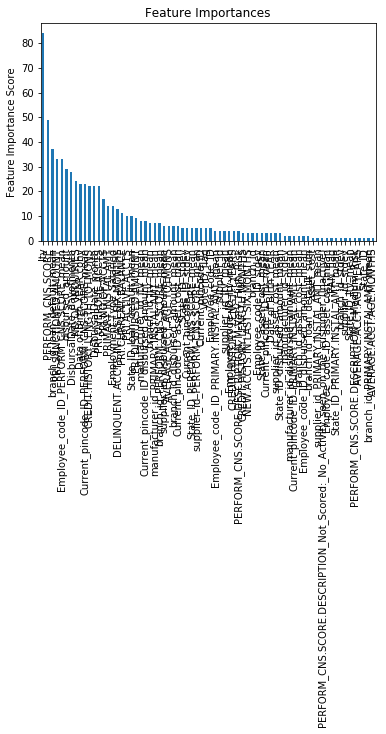

In [88]:
%%time
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 5)

modelfit_mod(model6, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=29, learning_rate=0.1, random_state=0)

modelfit_mod(ada, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time

from sklearn.ensemble import VotingClassifier

model9 = VotingClassifier(estimators=[('RF', model6),('Xgb', XGBClassifier()), ('adaboost', ada)], voting='soft')

modelfit_mod(model9, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [89]:
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

[0]	train-auc:0.631518+0.000549918	test-auc:0.623656+0.00284832
[1]	train-auc:0.639231+0.000680342	test-auc:0.631099+0.001794
[2]	train-auc:0.642678+0.000867173	test-auc:0.633932+0.00149499
[3]	train-auc:0.645848+0.00054162	test-auc:0.636757+0.0014643
[4]	train-auc:0.6483+0.000959876	test-auc:0.638455+0.00194235
[5]	train-auc:0.650547+0.000670561	test-auc:0.640251+0.00234455
[6]	train-auc:0.651825+0.000864803	test-auc:0.641297+0.00242577
[7]	train-auc:0.653853+0.00102027	test-auc:0.642791+0.00254882
[8]	train-auc:0.65507+0.00110461	test-auc:0.643836+0.00227823
[9]	train-auc:0.656324+0.000931138	test-auc:0.644591+0.00203562
[10]	train-auc:0.658103+0.000826982	test-auc:0.646015+0.00208558
[11]	train-auc:0.659281+0.000912034	test-auc:0.646705+0.00208915
[12]	train-auc:0.660329+0.000801209	test-auc:0.647588+0.00199818
[13]	train-auc:0.661594+0.000693501	test-auc:0.648502+0.0019236
[14]	train-auc:0.662411+0.000784897	test-auc:0.649059+0.00195332
[15]	train-auc:0.66362+0.000612471	test-auc:0

[127]	train-auc:0.724169+0.000803186	test-auc:0.671568+0.00125026
[128]	train-auc:0.7244+0.000787331	test-auc:0.67155+0.00127223
[129]	train-auc:0.724675+0.000793977	test-auc:0.671598+0.00128618
[130]	train-auc:0.724992+0.000853935	test-auc:0.671608+0.00123357
[131]	train-auc:0.725355+0.000830419	test-auc:0.671641+0.00128789
[132]	train-auc:0.72564+0.000841895	test-auc:0.671642+0.00130736
[133]	train-auc:0.725969+0.000911513	test-auc:0.671707+0.00131197
[134]	train-auc:0.726331+0.000933536	test-auc:0.671782+0.00133749
[135]	train-auc:0.726671+0.000891356	test-auc:0.671772+0.00137511
[136]	train-auc:0.726958+0.000832433	test-auc:0.671786+0.00140026
[137]	train-auc:0.727346+0.000820999	test-auc:0.671792+0.00140387
[138]	train-auc:0.727667+0.000910451	test-auc:0.671852+0.00139776
[139]	train-auc:0.72798+0.000956518	test-auc:0.67187+0.00139076
[140]	train-auc:0.728329+0.000923986	test-auc:0.67189+0.0013804
[141]	train-auc:0.728634+0.00091044	test-auc:0.671884+0.00133376
[142]	train-auc:0.7

[254]	train-auc:0.757687+0.00132674	test-auc:0.67254+0.00175766
[255]	train-auc:0.757884+0.00129531	test-auc:0.672525+0.00177584
[256]	train-auc:0.758058+0.00130191	test-auc:0.672487+0.00178383
[257]	train-auc:0.758381+0.00132985	test-auc:0.672492+0.0017949
[258]	train-auc:0.758564+0.00129827	test-auc:0.672495+0.00181582
[259]	train-auc:0.758894+0.00124472	test-auc:0.672475+0.00183566
[260]	train-auc:0.759129+0.00129095	test-auc:0.672487+0.00182007
[261]	train-auc:0.759387+0.0012954	test-auc:0.672489+0.00184956
[262]	train-auc:0.759647+0.00128288	test-auc:0.672482+0.00186376
[263]	train-auc:0.759801+0.00127283	test-auc:0.672468+0.00185393
[264]	train-auc:0.760019+0.00132124	test-auc:0.672458+0.00187402
[265]	train-auc:0.76028+0.00134374	test-auc:0.672466+0.00186041
[266]	train-auc:0.760508+0.0013605	test-auc:0.67251+0.00190163
[267]	train-auc:0.760742+0.00134239	test-auc:0.672531+0.00190213
[268]	train-auc:0.760987+0.00128234	test-auc:0.672451+0.00190127
[269]	train-auc:0.761244+0.0012

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7845
AUC Score (Train): 0.677463


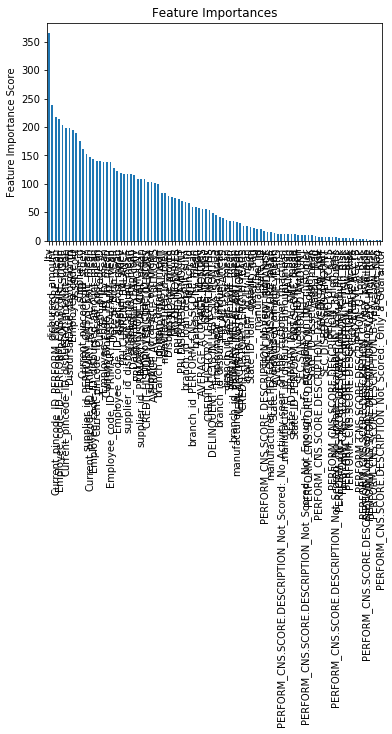

In [90]:
#replce top_20_ft with predictors to run model on all the features
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
top_20_features = pd.Series(model1.get_booster().get_fscore()).sort_values(ascending=False)[:25]

In [ ]:
top_20_ft = list(top_20_features.index)

In [ ]:
top_20_ft

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.metrics import roc_curve, auc
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Performance(model1,y_validation,X_validation)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
%%time
np.linspace(0,1,11)

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='roc_auc',cv=5).mean()

param_space = {
    'learning_rate': hp.choice('learning_rate', [0.1,0.1]),#np.linspace(0,1,11)),
    
    'n_estimators': hp.choice('n_estimators', [300,300]),
    
    'max_depth': hp.choice('max_depth', [3, 5, 7, 9]), #range(1,20)),
                               
    'min_child_weight': hp.choice('min_child_weight', [1, 3, 5]), #range(1,7)),
    
    'gamma': hp.choice('gamma', [0,0]),#np.linspace(0,1,11)),
    
    'subsample': hp.choice('subsample', [0.8,0.8]),#np.linspace(0,1,11)),
    
    'colsample_bytree': hp.choice('colsample_bytree',[0.8,0.8])# np.linspace(0,1,11)),
    
#     'max_features': hp.choice('max_features', range(1,55)),
    
#     'criterion': hp.choice('criterion', ["gini", "entropy"])
#                        
     }

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=5, trials=trials)
print ('best:')
print (best)


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [ ]:
%%time
param_test1 = {
 'max_depth':[3, 5, 7],
 'min_child_weight':[1, 3, 5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=300, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


In [ ]:


param_test2 = {
 'max_depth':[4, 5, 6],
 'min_child_weight':[2,3,4]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=29, max_depth=6,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train_std,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

param_test2b = {
 'min_child_weight':[2,3,4,5,6,7,8]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=29, max_depth=6,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch2b.fit(X_train_std,y)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_


param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=29, max_depth=6,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train_std,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_



model2 = XGBClassifier(learning_rate =0.1,
 n_estimators=29,
 max_depth=6,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=6,
 scale_pos_weight=1,
 seed=27)
 
#classification_model(model, df,predictor_var,outcome_var)

modelfit(model2, X,y, predictor_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=28, max_depth=6,
 min_child_weight=3, gamma=0, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train_std,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=28, max_depth=8,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(df[predictor_var],df[outcome_var])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_


param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=28, max_depth=6,
 min_child_weight=3, gamma=0, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train_std,y)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_


param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.09]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=28, max_depth=6,
 min_child_weight=3, gamma=0.1,reg_alpha = 0.01, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train_std,y)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_


xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=29,
 max_depth=6,
 min_child_weight=3,
 gamma=0.1,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=0.001,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb4, X_train_std,y , predictor_var,useTrainCV=True, cv_folds=5)